Практика. Часть 1


В практической части к текущему модулю разберём, как работает Q-learning (обучение с подкреплением с использование Q-функций).

Для этого для задачи FrozenLake разберём :

пример табличной Q-функции;
пример нейросетевой функции или Deep Q-Network (DQN).

Табличный Q-Learning для задачи FrozenLake

Видео № 1

In [1]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False)



NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


In [3]:
lr = 0.8
gamma = 0.95

NUM_EPISODES = 3000
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20

In [4]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS])

pathLenList = []
totalRewardList = []
totalRewardAverageList = []

In [5]:
for i in range(NUM_EPISODES):
    
    eps = 1.0 - float(i) / NUM_EPISODES

    s, _ = env.reset()  # Учитываем новый формат reset()
    s = int(s)  # Приводим к int

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s, :])
        
        a = int(a)  # Приводим к int
        s1, r, done, truncated, _ = env.step(a)
        s1 = int(s1)  # Приводим к int
        
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1, :])
            
        Q[s, a] = (1 - lr) * Q[s, a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        if done or truncated:  # Учитываем оба варианта завершения
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    
    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print(f'Episode {i}: average total reward = {totalRewardAverage}')


Episode 100: average total reward = 0.0
Episode 200: average total reward = 0.0
Episode 300: average total reward = 0.15
Episode 400: average total reward = 0.0
Episode 500: average total reward = 0.05
Episode 600: average total reward = 0.15
Episode 700: average total reward = 0.15
Episode 800: average total reward = 0.1
Episode 900: average total reward = 0.2
Episode 1000: average total reward = 0.15
Episode 1100: average total reward = 0.1
Episode 1200: average total reward = 0.3
Episode 1300: average total reward = 0.2
Episode 1400: average total reward = 0.4
Episode 1500: average total reward = 0.45
Episode 1600: average total reward = 0.35
Episode 1700: average total reward = 0.5
Episode 1800: average total reward = 0.45
Episode 1900: average total reward = 0.7
Episode 2000: average total reward = 0.75
Episode 2100: average total reward = 0.5
Episode 2200: average total reward = 0.8
Episode 2300: average total reward = 0.9
Episode 2400: average total reward = 0.75
Episode 2500: a

/Users/apple/python/SkillFactory/Ml_learning/venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [6]:
print(Q)

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


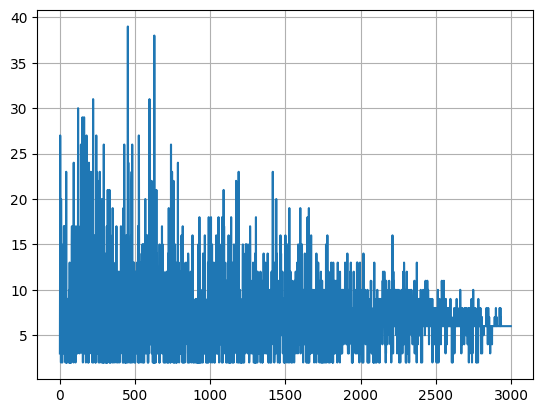

In [7]:
plt.plot(pathLenList)
plt.grid()

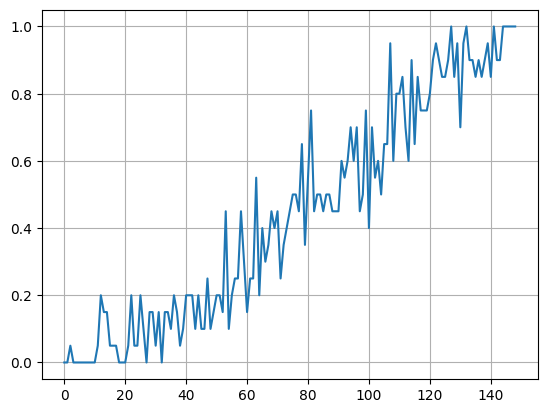

In [8]:
plt.plot(totalRewardAverageList)
plt.grid()

In [9]:
USE_Q = False

s, _ = env.reset()  # Учитываем новый формат reset()
s = int(s)  # Приводим к int

for _ in range(1000):
    env.render()
    if USE_Q:
        a = np.argmax(Q[s, :])
    else:
        a = env.action_space.sample()
    
    a = int(a)  # Приводим к int
    s, r, done, truncated, _ = env.step(a)
    s = int(s)  # Приводим к int
    
    if done or truncated:  # Учитываем оба варианта завершения
        env.render()
        print(f'Reward = {r}')
        break
        
env.close()


Reward = 0.0


/Users/apple/python/SkillFactory/Ml_learning/venv/lib/python3.10/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


In [10]:
# import numpy as np
# import gym
# import time

# USE_Q = False

# env = gym.make("FrozenLake-v1", render_mode="human")  # Включаем визуализацию
# s, _ = env.reset()
# s = int(s)  # Приводим к int

# for _ in range(1000):
#     env.render()
#     time.sleep(0.1)  # Даем время для отрисовки
    
#     if USE_Q:
#         a = np.argmax(Q[s, :])
#     else:
#         a = env.action_space.sample()
    
#     a = int(a)  # Приводим к int
#     s, r, done, truncated, _ = env.step(a)
#     s = int(s)  # Приводим к int
    
#     if done or truncated:
#         env.render()
#         print(f"Reward = {r}")
#         break
        
# env.close()


Используемый в видео notebook: q-table-learning.ipynb

Эмулятором среды в нашем примере будет являться библиотека gym. 

Запустив Load GYM environment, получим количество потенциальных состояний и действий.
Протестируем среду в блоке Run simulation в конце ноутбука. Rendering  игры представлен наборами значений, описывающими значения в ячейках поля 4 × 4. 
Обучим табличный Q-learning. Зададим параметры в блоке Settings.
Инициализируем таблицу  в Q-Table initialization.